In [122]:
import numpy as np
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import iqr
from scipy.stats import cauchy
import matplotlib.pyplot as plt

In [109]:
# 4.19
# part i
def draw(n):
    z = np.random.normal(0,1,n)
    k = np.random.randint(4, size=n) + 1
    return z + 3 * k

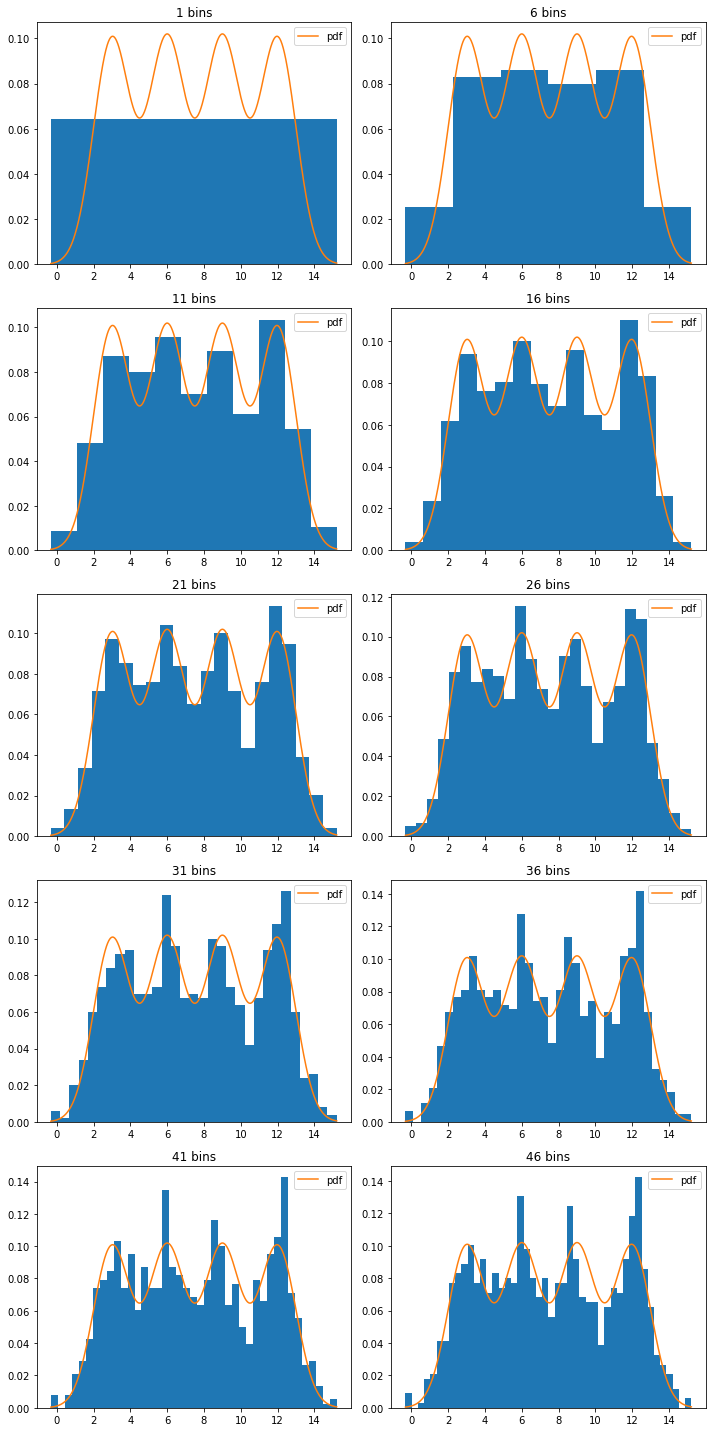

In [110]:
# part ii
fig = plt.figure(figsize=(10,20))

x = draw(1000)
a = np.min(x)
b = np.max(x)
m = np.arange(1,47,5)

domain = np.linspace(a, b, 1000)

standard_norm = lambda y: 1/4 * sum([np.exp(-(y-3*i)**2 / 2) / np.sqrt(2 * np.pi) for i in range(1,5)])
for i,bins in enumerate(m):
    ax = fig.add_subplot(5, 2, i+1)
    ax.hist(x, bins=bins, range=(a,b), density=True)
    ax.plot(domain, standard_norm(domain), label='pdf')
    ax.set_title(str(bins) + ' bins')
    ax.legend()
fig.tight_layout()

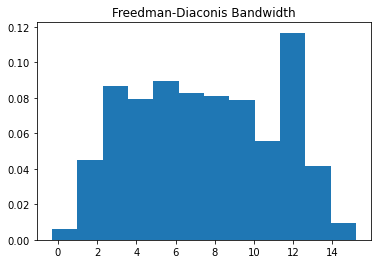

In [111]:
# part iii
bin_width = 2 * iqr(x)/np.cbrt(len(x))

plt.hist(x, bins=int((b-a)/bin_width), range=(a,b), density=True)
plt.title('Freedman-Diaconis Bandwidth')
plt.show()

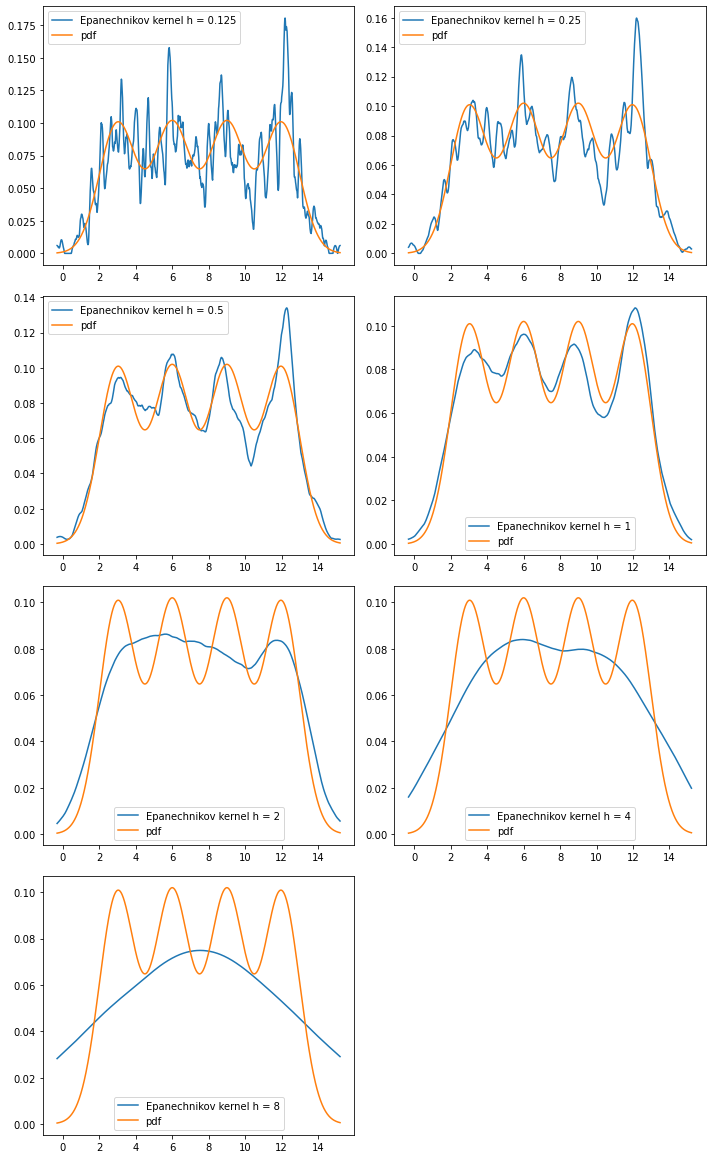

In [112]:
# 4.20
# part i
fig = plt.figure(figsize=(10,20))
n = 1000

domain = np.linspace(a, b, 1000)
h_vals = [2**i for i in range(-3,4)]
K = lambda x: max(0.75 * (1 - x**2), 0)
KDE = lambda y: 1/n * 1/h * sum([K((y - x[i])/h) for i in range(n)])
for i,h in enumerate(h_vals):
    ax = fig.add_subplot(5, 2, i+1)
    z = [KDE(domain[i]) for i in range(n)]
    ax.plot(domain, z, label='Epanechnikov kernel h = ' + str(h))
    ax.plot(domain, standard_norm(domain), label='pdf')
    ax.legend()
fig.tight_layout()   
    
    

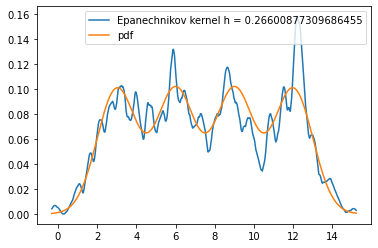

In [113]:
# part ii
h = 1.059 * (len(x)**(-1/5))
K = lambda x: max(0.75 * (1 - x**2), 0)
KDE = lambda y: 1/n * 1/h * sum([K((y - x[i])/h) for i in range(n)])
z = [KDE(domain[i]) for i in range(n)]
plt.plot(domain, z, label='Epanechnikov kernel h = ' + str(h))
plt.plot(domain, standard_norm(domain), label='pdf')

plt.legend()
plt.show()

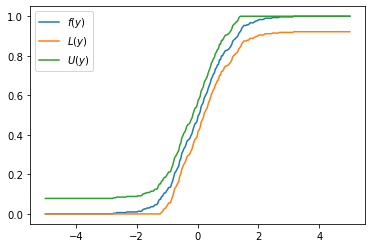

In [119]:
# 4.22
# part i
n = 300
x = np.random.normal(size=(n,))
f = lambda y: (y > x).sum() / n

alpha = .05

eps = np.sqrt(1/(2*n) * np.log(2 / alpha))

L = lambda y: max(f(y) - eps, 0)
U = lambda y: min(f(y) + eps, 1)

domain = np.linspace(-5,5,n)

Fy = [f(y) for y in domain]
Ly = [L(y) for y in domain]
Uy = [U(y) for y in domain]

plt.plot(domain, Fy, label=r'$f(y)$')
plt.plot(domain, Ly, label=r'$L(y)$')
plt.plot(domain, Uy, label=r'$U(y)$')

plt.legend()
plt.show()

In [121]:
# part ii
cdf_values = norm.cdf(domain)
abv = (cdf_values > Uy).sum()
below = (cdf_values < Ly).sum()

print("True CDF left the bounds of Uy and Ly ", (abv+below)/n, "% of the time.")

True CDF left the bounds of Uy and Ly  0.0 % of the time.


In [124]:
# part iii
cdf_values = cauchy.cdf(domain)
abv = (cdf_values > Uy).sum()
below = (cdf_values < Ly).sum()

print("True CDF for the Cauchy Dist left the bounds of Uy and Ly ", (abv+below)/n, "% of the time.")

True CDF for the Cauchy Dist left the bounds of Uy and Ly  0.66 % of the time.
